In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

In [5]:
df = pd.read_csv("data/movielens/movielens/ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
df.shape, df.columns

((100004, 4),
 Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object'))

In [9]:
# datetime 초 단위로 변환
pd.to_datetime(df['timestamp'].astype(int), unit='s')

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
                 ...        
99999    2003-10-08 02:16:10
100000   2003-10-03 02:46:41
100001   2003-12-09 03:26:03
100002   2003-12-09 14:21:03
100003   2004-01-22 15:18:44
Name: timestamp, Length: 100004, dtype: datetime64[ns]

In [13]:
df['date'] = pd.to_datetime(df['timestamp'].astype(int), unit='s')
df['year'] = df['date'].apply(lambda x: x.year)
df

,userId,movieId,rating,timestamp,date,year
0,1,31,2.5,1260759144,2009-12-14 02:52:24,2009
1,1,1029,3.0,1260759179,2009-12-14 02:52:59,2009
2,1,1061,3.0,1260759182,2009-12-14 02:53:02,2009
3,1,1129,2.0,1260759185,2009-12-14 02:53:05,2009
4,1,1172,4.0,1260759205,2009-12-14 02:53:25,2009
...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,2003-10-08 02:16:10,2003
100000,671,6269,4.0,1065149201,2003-10-03 02:46:41,2003
100001,671,6365,4.0,1070940363,2003-12-09 03:26:03,2003
100002,671,6385,2.5,1070979663,2003-12-09 14:21:03,2003


In [18]:
yearCounts = df.groupby('year').size()
yearCounts.columns=['counts']
yearCounts = pd.DataFrame(data=yearCounts, columns=['counts'])
yearCounts

,counts
year,
1995,3
1996,6239
1997,3294
1998,1825
1999,5901
2000,13869
2001,4658
2002,3938
2003,4462


<AxesSubplot:xlabel='year'>

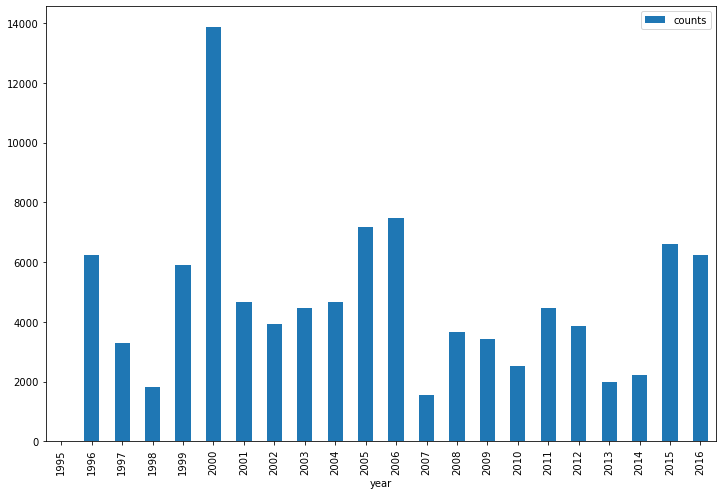

In [21]:
yearCounts.plot(kind='bar', figsize=(12, 8), label='counts', legend=True)

In [23]:
# 90% sample data 추출
train = df.sample(frac=0.9, random_state=42)
train['type'] = 'train'
train.head()

,userId,movieId,rating,timestamp,date,year,type
19090,128,1028,5.0,1049690908,2003-04-07 04:48:28,2003,train
99678,665,4736,1.0,1010197684,2002-01-05 02:28:04,2002,train
18455,120,4002,3.0,1167420604,2006-12-29 19:30:04,2006,train
35755,257,1274,4.0,1348544094,2012-09-25 03:34:54,2012,train
66536,468,6440,4.0,1296191715,2011-01-28 05:15:15,2011,train


In [25]:
test = df.drop(train.index)
test['type'] = 'test'
test.head()

,userId,movieId,rating,timestamp,date,year,type
28,2,144,3.0,835356016,1996-06-21 11:20:16,1996,test
55,2,349,4.0,835355441,1996-06-21 11:10:41,1996,test
60,2,367,3.0,835355619,1996-06-21 11:13:39,1996,test
66,2,405,2.0,835356246,1996-06-21 11:24:06,1996,test
74,2,497,3.0,835355880,1996-06-21 11:18:00,1996,test


In [27]:
avg_rating = train['rating'].mean()
avg_rating

3.544436913914937

In [28]:
avg_pred = test[['userId', 'movieId', 'rating']].copy()
avg_pred['pred'] = avg_rating
avg_pred.head()

,userId,movieId,rating,pred
28,2,144,3.0,3.544437
55,2,349,4.0,3.544437
60,2,367,3.0,3.544437
66,2,405,2.0,3.544437
74,2,497,3.0,3.544437


In [43]:
avg_pred_errors = avg_pred['pred'] - avg_pred['rating']
mae = avg_pred_errors.abs().mean()
rmse = math.sqrt(avg_pred_errors.pow(2).mean())
print(mae, rmse)

0.8590057664103801 1.0658502945734718


In [44]:
user_avg_ratings = train[['userId', 'rating']].groupby('userId').agg('mean')
user_avg_ratings.columns = ['pred']
user_avg_ratings

,pred
userId,
1,2.550000
2,3.514286
3,3.600000
4,4.352273
5,3.923077
...,...
667,3.661290
668,3.722222
669,3.483871


In [45]:
user_avg_pred = test[['userId', 'movieId', 'rating']]
user_avg_pred = pd.merge(user_avg_pred, user_avg_ratings, how='left', left_on=['userId'], right_on=['userId'], right_index=False)
user_avg_pred.head(10)

,userId,movieId,rating,pred
0,2,144,3.0,3.514286
1,2,349,4.0,3.514286
2,2,367,3.0,3.514286
3,2,405,2.0,3.514286
4,2,497,3.0,3.514286
5,2,509,4.0,3.514286
6,3,866,3.0,3.600000
7,3,1378,4.0,3.600000
8,3,2716,3.0,3.600000
9,3,3510,4.0,3.600000


In [46]:
user_avg_pred_errors = user_avg_pred['pred'] - user_avg_pred['rating']
mae2 = user_avg_pred_errors.abs().mean()
rmse2 = math.sqrt(user_avg_pred_errors.pow(2).mean())
print(mae2, rmse2)

0.7646023337988347 0.9774958754079373


In [47]:
item_avg_ratings = train[['movieId', 'rating']].groupby('movieId').agg('mean')
item_avg_ratings.columns = ['pred']
item_avg_ratings

,pred
movieId,
1,3.883772
2,3.415842
3,3.086538
4,2.384615
5,3.275510
...,...
161944,5.000000
162376,4.500000
162542,5.000000


In [48]:
item_avg_pred = test[['userId', 'movieId', 'rating']]
item_avg_pred = pd.merge(item_avg_pred, item_avg_ratings, how='left', left_on=['movieId'], right_on=['movieId'], right_index=False)
item_avg_pred.head(10)

,userId,movieId,rating,pred
0,2,144,3.0,3.363636
1,2,349,4.0,3.793814
2,2,367,3.0,3.104167
3,2,405,2.0,2.227273
4,2,497,3.0,4.037736
5,2,509,4.0,3.696970
6,3,866,3.0,3.891304
7,3,1378,4.0,3.222222
8,3,2716,3.0,3.759690
9,3,3510,4.0,3.557143


In [49]:
item_avg_pred_errors = item_avg_pred['pred'] - item_avg_pred['rating']
mae3 = item_avg_pred_errors.abs().mean()
rmse3 = math.sqrt(item_avg_pred_errors.pow(2).mean())
print(mae3, rmse3)

0.7661265357395528 0.9826766805711735


In [50]:
df_movie = pd.read_csv('data/movielens/movielens/movies_w_imgurl.csv')
df_movie.head()

,movieId,imdbId,title,genres,imgurl
0,1,114709,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,https://images-na.ssl-images-amazon.com/images...
1,2,113497,Jumanji (1995),Adventure|Children|Fantasy,https://images-na.ssl-images-amazon.com/images...
2,3,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,4,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,5,113041,Father of the Bride Part II (1995),Comedy,https://images-na.ssl-images-amazon.com/images...


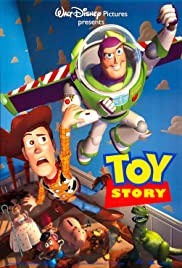

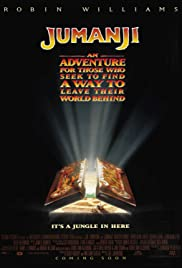

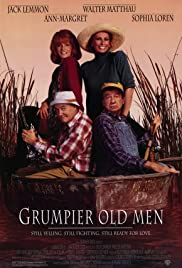

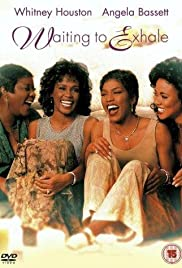

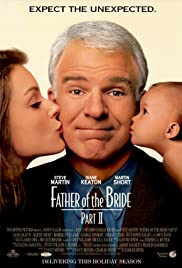

In [51]:
from IPython.display import Image, display

for i in range(0, 5):
    display(Image(df_movie['imgurl'].iloc[i]))